In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir('/content/drive/MyDrive/business')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time, warnings
import datetime as dt

In [4]:
data = pd.read_csv("sales_data_sample.csv", encoding = "latin1")
print(data.__len__())
data.head()

2823


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [14]:
data['fullname'] = data['CONTACTLASTNAME'] +" "+ data['CONTACTFIRSTNAME']
data.fullname.value_counts()

Freyre Diego         259
Nelson Valarie       180
Ferguson Peter        55
Labrune Janine        53
Ashworth Victoria     51
                    ... 
Kuo Kee               10
Cartrain Pascale       8
Taylor Leslie          8
Schmitt Carine         7
Young Leslie           3
Name: fullname, Length: 92, dtype: int64

In [15]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
data[data['fullname'] == 'NelsonValarie'].PHONE.value_counts()

Series([], Name: PHONE, dtype: int64)

In [17]:
data[data.PHONE=='(91) 555 94 44'].fullname.value_counts().tolist()

[259]

In [18]:
for phone in data.PHONE.unique():
  sub = data[data.PHONE==phone]
  try:
    assert len(sub.fullname.value_counts().tolist()) ==1
  except:
    print(phone)

6175558555


In [19]:
pd.set_option('display.max_columns', 27)
data[data.PHONE=='6175558555']


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,fullname
15,10285,36,100.00,6,4099.68,8/27/2004 0:00,Shipped,3,8,2004,Motorcycles,95,S10_1678,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NaN,Hernandez,Marta,Medium,Hernandez Marta
49,10369,41,100.00,2,4514.92,1/20/2005 0:00,Shipped,1,1,2005,Classic Cars,214,S10_1949,Collectables For Less Inc.,6175558555,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,NaN,Nelson,Allen,Medium,Nelson Allen
69,10285,47,100.00,9,6484.59,8/27/2004 0:00,Shipped,3,8,2004,Motorcycles,118,S10_2016,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NaN,Hernandez,Marta,Medium,Hernandez Marta
95,10285,27,100.00,8,5438.07,8/27/2004 0:00,Shipped,3,8,2004,Motorcycles,193,S10_4698,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NaN,Hernandez,Marta,Medium,Hernandez Marta
150,10305,38,100.00,13,6680.78,10/13/2004 0:00,Shipped,4,10,2004,Classic Cars,147,S10_4962,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NaN,Hernandez,Marta,Medium,Hernandez Marta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,10305,42,100.00,3,4618.32,10/13/2004 0:00,Shipped,4,10,2004,Trucks and Buses,115,S50_1392,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NaN,Hernandez,Marta,Medium,Hernandez Marta
2446,10285,39,78.92,2,3077.88,8/27/2004 0:00,Shipped,3,8,2004,Motorcycles,81,S50_4713,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NaN,Hernandez,Marta,Medium,Hernandez Marta
2547,10274,24,90.52,5,2172.48,7/21/2004 0:00,Shipped,3,7,2004,Ships,90,S700_2047,Collectables For Less Inc.,6175558555,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,NaN,Nelson,Allen,Small,Nelson Allen
2653,10285,45,100.00,13,5392.80,8/27/2004 0:00,Shipped,3,8,2004,Planes,118,S700_2834,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NaN,Hernandez,Marta,Medium,Hernandez Marta


In [20]:
data.PHONE.value_counts()

(91) 555 94 44      259
4155551450          180
03 9520 4555         55
40.67.8555           53
(171) 555-1555       51
                   ... 
2125551957           10
(071) 23 67 2555      8
6175558428            8
40.32.2555            7
3105552373            3
Name: PHONE, Length: 91, dtype: int64

In [21]:
data.fullname.value_counts()


Freyre Diego         259
Nelson Valarie       180
Ferguson Peter        55
Labrune Janine        53
Ashworth Victoria     51
                    ... 
Kuo Kee               10
Cartrain Pascale       8
Taylor Leslie          8
Schmitt Carine         7
Young Leslie           3
Name: fullname, Length: 92, dtype: int64

In [22]:
data.ADDRESSLINE1.value_counts()


C/ Moralzarzal, 86              259
5677 Strong St.                 180
636 St Kilda Road                55
67, rue des Cinquante Otages     53
Fauntleroy Circus                51
                               ... 
5290 North Pendale Street        10
Boulevard Tirou, 255              8
16780 Pompton St.                 8
54, rue Royale                    7
4097 Douglas Av.                  3
Name: ADDRESSLINE1, Length: 92, dtype: int64

# Data cleaning, preparation, manipulation

In [23]:
# Getting basic statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [24]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [25]:
# Defining a new column with customers' full name
data["CONTACTNAME"] = data["CONTACTFIRSTNAME"] + " " + data["CONTACTLASTNAME"]

In [26]:
# Dropping the columns that we do not need
data = data.drop(["ORDERLINENUMBER", "QTR_ID","MONTH_ID","YEAR_ID","MSRP","PHONE","ADDRESSLINE1", 
                  "ADDRESSLINE2", "CITY", "STATE", "POSTALCODE", "CONTACTFIRSTNAME", "CONTACTLASTNAME"], axis=1)
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,COUNTRY,TERRITORY,DEALSIZE,fullname,CONTACTNAME
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,USA,NaN,Small,Yu Kwai,Kwai Yu
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,Motorcycles,S10_1678,Reims Collectables,France,EMEA,Small,Henriot Paul,Paul Henriot
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,Motorcycles,S10_1678,Lyon Souveniers,France,EMEA,Medium,Da Cunha Daniel,Daniel Da Cunha
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,USA,NaN,Medium,Young Julie,Julie Young
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,Motorcycles,S10_1678,Corporate Gift Ideas Co.,USA,NaN,Medium,Brown Julie,Julie Brown


In [27]:
# Checking if ORDERNUMBER has any duplicates
print(data.duplicated(["ORDERNUMBER"], keep = "first"))

0       False
1       False
2       False
3       False
4       False
        ...  
2818     True
2819     True
2820     True
2821     True
2822     True
Length: 2823, dtype: bool


In [28]:
# Dropping duplicates
data = data.drop_duplicates(subset = "ORDERNUMBER")

In [29]:
# Converting ORDERDATE column to Datetime format
data['ORDERDATE'] = pd.DatetimeIndex(data['ORDERDATE']).date
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,COUNTRY,TERRITORY,DEALSIZE,fullname,CONTACTNAME
0,10107,30,95.70,2871.00,2003-02-24,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,USA,NaN,Small,Yu Kwai,Kwai Yu
1,10121,34,81.35,2765.90,2003-05-07,Shipped,Motorcycles,S10_1678,Reims Collectables,France,EMEA,Small,Henriot Paul,Paul Henriot
2,10134,41,94.74,3884.34,2003-07-01,Shipped,Motorcycles,S10_1678,Lyon Souveniers,France,EMEA,Medium,Da Cunha Daniel,Daniel Da Cunha
3,10145,45,83.26,3746.70,2003-08-25,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,USA,NaN,Medium,Young Julie,Julie Young
4,10159,49,100.00,5205.27,2003-10-10,Shipped,Motorcycles,S10_1678,Corporate Gift Ideas Co.,USA,NaN,Medium,Brown Julie,Julie Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,10199,29,38.40,1113.60,2003-12-01,Shipped,Vintage Cars,S50_1341,West Coast Collectables Co.,USA,NaN,Small,Thompson Steve,Steve Thompson
2532,10397,32,80.55,2577.60,2005-03-28,Shipped,Ships,S700_1938,Alpha Cognac,France,EMEA,Small,Roulet Annette,Annette Roulet
2554,10352,23,100.00,2352.67,2004-12-03,Shipped,Ships,S700_2047,Auto-Moto Classics Inc.,USA,NaN,Small,Taylor Leslie,Leslie Taylor
2692,10118,36,100.00,4219.20,2003-04-21,Shipped,Ships,S700_3505,Enaco Distributors,Spain,EMEA,Medium,Saavedra Eduardo,Eduardo Saavedra


In [30]:
len(data["CONTACTNAME"].unique())

92

In [ ]:
# Unique names: 92
# Total unique rows: 307
# Therefore CONTACTNAME column is not unique

In [31]:
# Basic statistics for new data
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES
count,307.000000,307.000000,307.000000,307.000000
mean,10261.915309,35.205212,93.351596,4588.486906
std,93.946373,10.431550,14.912985,2142.986902
min,10100.000000,6.000000,34.910000,553.950000
25%,10180.500000,27.000000,96.915000,3010.500000
50%,10264.000000,35.000000,100.000000,4196.800000
75%,10341.500000,43.000000,100.000000,5855.460000
max,10425.000000,97.000000,100.000000,12001.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 2733
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      307 non-null    int64  
 1   QUANTITYORDERED  307 non-null    int64  
 2   PRICEEACH        307 non-null    float64
 3   SALES            307 non-null    float64
 4   ORDERDATE        307 non-null    object 
 5   STATUS           307 non-null    object 
 6   PRODUCTLINE      307 non-null    object 
 7   PRODUCTCODE      307 non-null    object 
 8   CUSTOMERNAME     307 non-null    object 
 9   COUNTRY          307 non-null    object 
 10  TERRITORY        188 non-null    object 
 11  DEALSIZE         307 non-null    object 
 12  fullname         307 non-null    object 
 13  CONTACTNAME      307 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 36.0+ KB


# RFM Analysis

In [33]:
# Creating Frequency
data_frequency = data.groupby(by=["CONTACTNAME"], as_index=False)["ORDERNUMBER"].count()
data_frequency.columns = ["NAME", "FREQUENCY"]
data_frequency.head()

,NAME,FREQUENCY
0,Adrian Huxley,4
1,Akiko Shimamura,4
2,Allen Nelson,3
3,Ann Brown,3
4,Anna O'Hara,4


In [ ]:
# Creating Recency
data_recency = data.groupby(by="CONTACTNAME", as_index=False)["ORDERDATE"].max()
data_recency.columns = ["NAME", "LASTORDERDATE"]
recent_date = data_recency["LASTORDERDATE"].max()
data_recency["RECENCY"] = data_recency["LASTORDERDATE"].apply(lambda x: (recent_date - x).days)
data_recency.head()

,NAME,LASTORDERDATE,RECENCY
0,Adrian Huxley,2005-05-29,2
1,Akiko Shimamura,2005-04-22,39
2,Allen Nelson,2005-01-20,131
3,Ann Brown,2004-12-03,179
4,Anna O'Hara,2005-03-09,83


In [ ]:
# Creating Monetary

# Because we already have SALES column which is the product of QUANTITYORDERED and PRICEEACH, it is already the Total column
# that we needed to create prior to Monetary
data_monetary = data.groupby(by="CONTACTNAME", as_index=False)["SALES"].sum()
data_monetary.columns = ["NAME", "MONETARY"]
data_monetary.head()

,NAME,MONETARY
0,Adrian Huxley,14824.93
1,Akiko Shimamura,16853.39
2,Allen Nelson,20484.68
3,Ann Brown,13642.35
4,Anna O'Hara,12435.55


In [ ]:
# Creating a new table
rf_data = data_recency.merge(data_frequency, on = "NAME")
rfm = rf_data.merge(data_monetary, on = "NAME")
rfm.head()

,NAME,LASTORDERDATE,RECENCY,FREQUENCY,MONETARY
0,Adrian Huxley,2005-05-29,2,4,14824.93
1,Akiko Shimamura,2005-04-22,39,4,16853.39
2,Allen Nelson,2005-01-20,131,3,20484.68
3,Ann Brown,2004-12-03,179,3,13642.35
4,Anna O'Hara,2005-03-09,83,4,12435.55


In [ ]:
# Ranking and normalizing ranks

rfm['R_RANK'] = rfm['RECENCY'].rank( ascending=False) 
rfm['F_RANK'] = rfm['FREQUENCY'].rank(ascending=True)
rfm['M_RANK'] = rfm['MONETARY'].rank(ascending=True)

rfm['R_RANKnorm']=(rfm['R_RANK']/rfm['R_RANK'].max())*100
rfm['F_RANKnorm']=(rfm['F_RANK']/rfm['F_RANK'].max())*100
rfm['M_RANKnorm']=(rfm['F_RANK']/rfm['M_RANK'].max())*100

In [ ]:
rfm["RFM_SCORE"] = 0.2*rfm["R_RANKnorm"] + 0.3*rfm["F_RANKnorm"] + 0.5*rfm["M_RANKnorm"]
rfm = rfm.round(0)
rfm.head()

,NAME,LASTORDERDATE,RECENCY,FREQUENCY,MONETARY,R_RANK,F_RANK,M_RANK,R_RANKnorm,F_RANKnorm,M_RANKnorm,RFM_SCORE
0,Adrian Huxley,2005-05-29,2,4,14825.0,88.0,78.0,60.0,96.0,85.0,85.0,87.0
1,Akiko Shimamura,2005-04-22,39,4,16853.0,78.0,78.0,72.0,86.0,85.0,85.0,85.0
2,Allen Nelson,2005-01-20,131,3,20485.0,59.0,50.0,82.0,64.0,54.0,54.0,56.0
3,Ann Brown,2004-12-03,179,3,13642.0,50.0,50.0,50.0,55.0,54.0,54.0,55.0
4,Anna O'Hara,2005-03-09,83,4,12436.0,68.0,78.0,46.0,74.0,85.0,85.0,83.0


C:\Users\galst\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RFM_SCORE', ylabel='Density'>

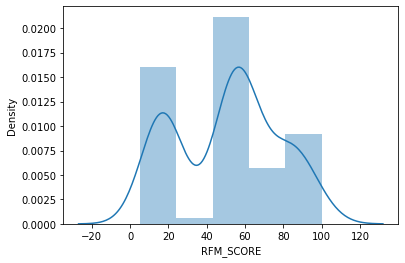

In [ ]:
sns.distplot(rfm['RFM_SCORE'])

## Customer Segmentation based on RFM

In [ ]:
rfm["CUSTOMER_SEGMENT"] = np.where(rfm["RFM_SCORE"]<25, "LEAVING",
                                  np.where((rfm["RFM_SCORE"]>=25) & (rfm["RFM_SCORE"]<50), "RISKY",
                                          np.where((rfm["RFM_SCORE"]>=50) & (rfm["RFM_SCORE"]<75), "POTENTIAL",
                                                  "LOYAL")))
rfm.head()

,NAME,LASTORDERDATE,RECENCY,FREQUENCY,MONETARY,R_RANK,F_RANK,M_RANK,R_RANKnorm,F_RANKnorm,M_RANKnorm,RFM_SCORE,CUSTOMER_SEGMENT
0,Adrian Huxley,2005-05-29,2,4,14825.0,88.0,78.0,60.0,96.0,85.0,85.0,87.0,LOYAL
1,Akiko Shimamura,2005-04-22,39,4,16853.0,78.0,78.0,72.0,86.0,85.0,85.0,85.0,LOYAL
2,Allen Nelson,2005-01-20,131,3,20485.0,59.0,50.0,82.0,64.0,54.0,54.0,56.0,POTENTIAL
3,Ann Brown,2004-12-03,179,3,13642.0,50.0,50.0,50.0,55.0,54.0,54.0,55.0,POTENTIAL
4,Anna O'Hara,2005-03-09,83,4,12436.0,68.0,78.0,46.0,74.0,85.0,85.0,83.0,LOYAL


# K-Means Clustering

First doing the K-means clustering based Recency, Frequency, and Monetary features.

In [ ]:
# Select columns we are interested in
data_kmeans = rfm[["RECENCY", "FREQUENCY", "MONETARY"]]
data_kmeans.head()

NameError: ignored

In [ ]:
# Checking the Elbow graph to find the appropriate number for k
wcss= [] 
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init="k-means++")
    k_means.fit(data_kmeans)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

The graph breaks in two points: 2 and 3 on x-axis. The angle of breaking point of 2 is more acute, so most probably the appropriate number of clusters is 2.

In [ ]:
# Define k-means with clusters of 2 and 3

# With 2 clusters
model_kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=22)
y_means2 = model_kmeans2.fit_predict(data_kmeans)

# With 3 clusters
model_kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=22)
y_means3 = model_kmeans3.fit_predict(data_kmeans)

In [ ]:
# Silhouette score for 2 clusters
silhouette_score(data_kmeans, y_means2)

In [ ]:
# Silhouette score for 3 clusters
silhouette_score(data_kmeans, y_means3)

Also because the silhouette score shows a larger value for 2, we should choose 2 as the appropriate number of clusters.

In [ ]:
data_kmeans["CLUSTER"] = y_means2
data_kmeans["CLUSTER"].value_counts()

Trying K-means clustering on other features: Priceeach and Quantityordered.

In [ ]:
data2_kmeans = data[["PRICEEACH", "QUANTITYORDERED"]]
data2_kmeans.head()

In [ ]:
# Checking the Elbow graph to find the appropriate number for k
wcss= [] 
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init="k-means++")
    k_means.fit(data2_kmeans)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

Again, the graph breaks on two points: 2 and 3.

In [ ]:
# Define k-means with clusters of 2 and 3

# With 2 clusters
model2_kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=32)
y2_means2 = model2_kmeans2.fit_predict(data2_kmeans)

# With 3 clusters
model2_kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=32)
y2_means3 = model2_kmeans3.fit_predict(data2_kmeans)

In [ ]:
# Silhouette score for 2 clusters
silhouette_score(data2_kmeans, y2_means2)

In [ ]:
# Silhouette score for 3 clusters
silhouette_score(data2_kmeans, y2_means3)

Again the silhouette score is larger for 2, therefore we use 2 clusters for the algorithm.

In [ ]:
data2_kmeans["CLUSTER"] = y2_means2
data2_kmeans["CLUSTER"].value_counts()